<a href="https://colab.research.google.com/github/BrendaG04/Google1D/blob/main/notebooks/CA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis (EDA) Plan for YouTube Trending Dataset
This notebook will guide through a structured EDA process for the YouTube trending dataset. The main steps include:
1. **Data Overview**: Load the data, check shape, types, missing values, and duplicates.
2. **Feature Understanding**: Review columns, unique values, and data types.
3. **Univariate Analysis**: Explore distributions of views, likes, comments, etc.
4. **Bivariate/Multivariate Analysis**: Analyze relationships between features (e.g., views vs. likes).
5. **Temporal Analysis**: Explore trends by publish time, trending time, etc.
6. **Text Analysis**: Analyze titles, tags, and descriptions for patterns.
7. **Outlier Detection**: Identify videos with extreme values.
8. **Summary**: Capture key findings and insights.

In [2]:
# Data Overview and Centralized Data Cleaning for the Youtube Trending Dataset
import pandas as pd

# Load the dataset
youtube_data_CA = pd.read_csv('../datasets/CA_youtube_trending_data.csv')

# --- CENTRALIZED DATA CLEANING --- #
# Remove duplicate rows
youtube_data_clean_CA = youtube_data_CA.drop_duplicates().copy()
# Fill missing values in 'description' with an empty string (most relevant missing col)
if 'description' in youtube_data_clean_CA.columns:
    youtube_data_clean_CA['description'] = youtube_data_clean_CA['description'].fillna('')

# After cleaning, show shape, types, missing values, and check that cleaning is successful
print("Shape after duplicate removal:", youtube_data_clean_CA.shape)
print("Data Types (first 10 columns):\n", youtube_data_clean_CA.dtypes.head(10))
print("Missing Values in numerical/target columns:\n", youtube_data_clean_CA[['view_count', 'likes', 'dislikes', 'comment_count']].isnull().sum())
print("Duplicate Rows Remaining:", youtube_data_clean_CA.duplicated().sum())
# Show first 3 rows of cleaned data to confirm
print("\nSample of cleaned data:")
display(youtube_data_clean_CA.head(3))

# This clean dataframe (youtube_data_clean_DE) will be used for all further modeling and analysis steps.

Shape after duplicate removal: (268633, 16)
Data Types (first 10 columns):
 video_id         object
title            object
publishedAt      object
channelId        object
channelTitle     object
categoryId        int64
trending_date    object
tags             object
view_count        int64
likes             int64
dtype: object
Missing Values in numerical/target columns:
 view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64
Duplicate Rows Remaining: 0

Sample of cleaned data:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."


In [3]:
# Feature Understanding: Review columns, unique values, and data types
print("\nColumn Names:", youtube_data_CA.columns.tolist())
print("\nUnique values in each column:")
for col in youtube_data_CA.columns:
    print(f"{col}: {youtube_data_CA[col].nunique()} unique values")


Column Names: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Unique values in each column:
video_id: 50875 unique values
title: 52360 unique values
publishedAt: 50414 unique values
channelId: 8879 unique values
channelTitle: 9156 unique values
categoryId: 15 unique values
trending_date: 1323 unique values
tags: 35790 unique values
view_count: 255222 unique values
likes: 137509 unique values
dislikes: 13293 unique values
comment_count: 33403 unique values
thumbnail_link: 50875 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
description: 52252 unique values


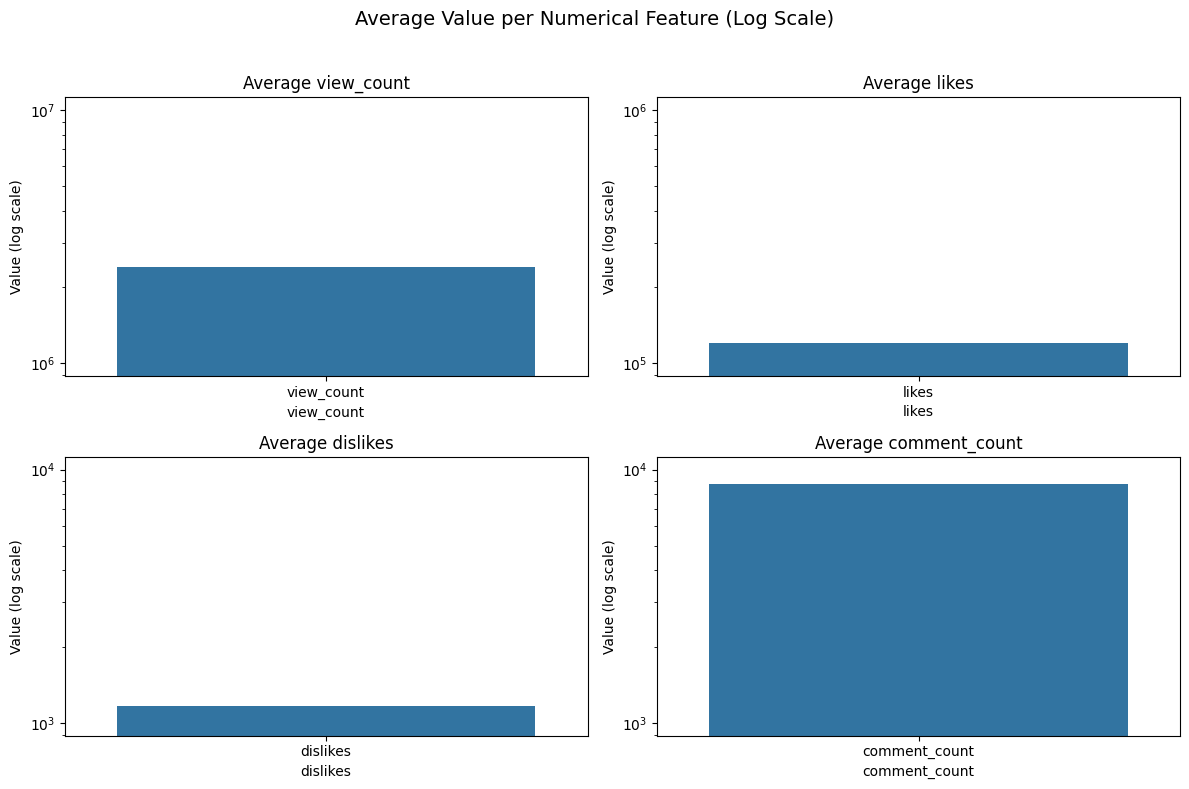

In [4]:
# Univariate Analysis: Distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['view_count', 'likes', 'dislikes', 'comment_count']

# Create subplots (2 rows, 2 columns) for feature averages on log scale
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
fig.suptitle("Average Value per Numerical Feature (Log Scale)", fontsize = 14)
axes = axes.flatten()

for i, col in enumerate(cols):
    avg_value = youtube_data_CA[col].mean()
    sns.barplot(x=[col], y = [avg_value], ax = axes[i])
    axes[i].set_yscale("log")
    axes[i].set_title(f"Average {col}")
    axes[i].set_ylabel("Value (log scale)")
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

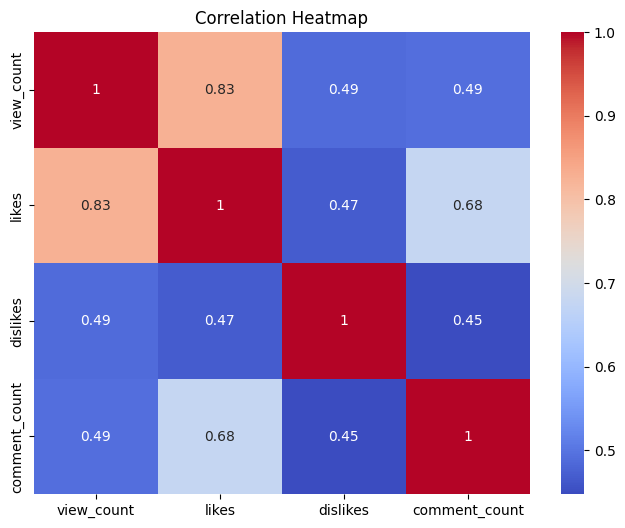

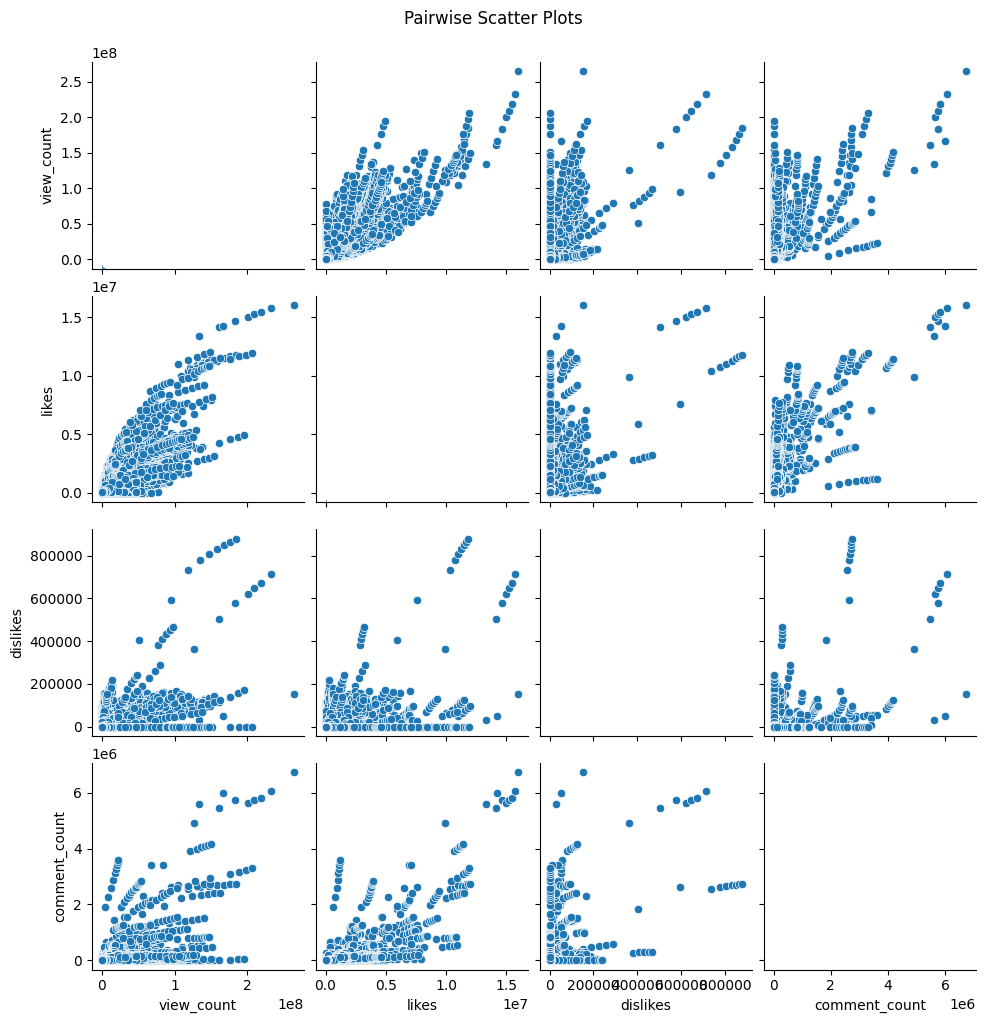

In [5]:
# Bivariate/Multivaraite Analysis: Correlation and scatter plots
plt.figure(figsize=(8, 6))
sns.heatmap(youtube_data_CA[['view_count', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for relationships between features
sns.pairplot(youtube_data_CA[['view_count', 'likes', 'dislikes', 'comment_count']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Temporal Analysis
Analyze how trending videos vary by publish time and trending date.

Available columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
Using publishedAt for temporal analysis.


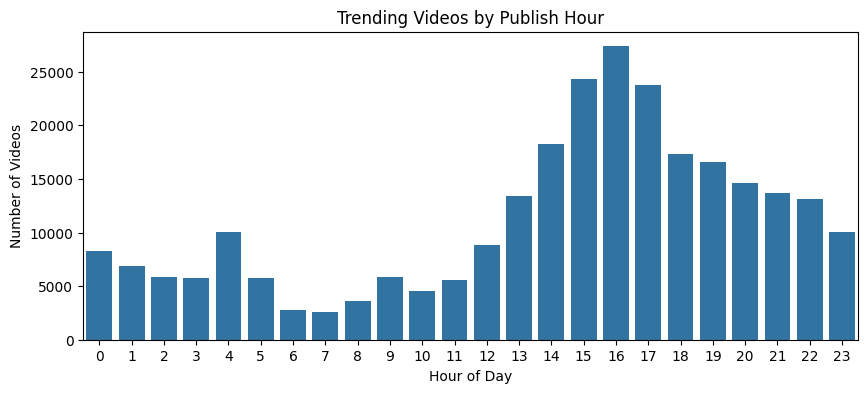

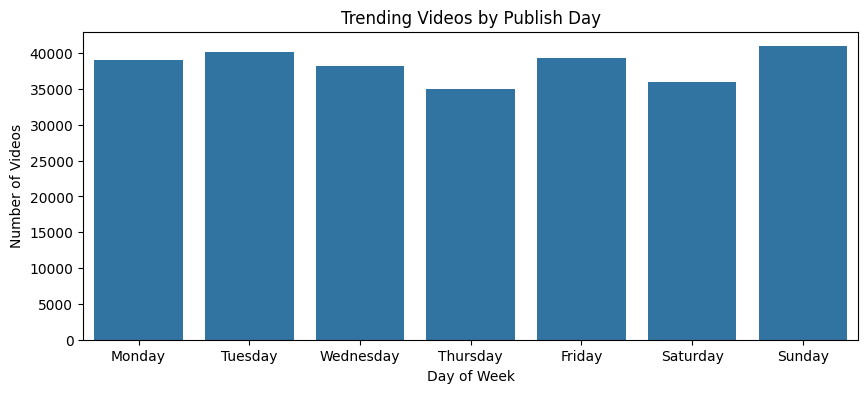

In [6]:
# Check available columns and use the correct datetime column for temporal analysis
print('Available columns:', youtube_data_CA.columns.tolist())
# Try common datetime column names
datetime_col = None
for col in ['publish_time', 'publishedAt', 'trending_date', 'trending_date_time', 'date']:
    if col in youtube_data_CA.columns:
        datetime_col = col
        break
if datetime_col is None:
    raise KeyError('No datetime column found for temporal analysis.')
print(f'Using {datetime_col} for temporal analysis.')

# Convert to datetime if needed
if not np.issubdtype(youtube_data_CA[datetime_col].dtype, np.datetime64):
    youtube_data_CA[datetime_col] = pd.to_datetime(youtube_data_CA[datetime_col])

# Extract hour and day of week
youtube_data_CA['publish_hour'] = youtube_data_CA[datetime_col].dt.hour
youtube_data_CA['publish_day'] = youtube_data_CA[datetime_col].dt.day_name()

# Plot distribution by hour
plt.figure(figsize=(10,4))
sns.countplot(x='publish_hour', data=youtube_data_CA)
plt.title('Trending Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()

# Plot distribution by day of week
plt.figure(figsize = (10,4))
sns.countplot(x='publish_day', data=youtube_data_CA, order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trending Videos by Publish Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.show()

# Text Analysis
Explore the most common words in video titles and tags.

Note: you may need to restart the kernel to use updated packages.


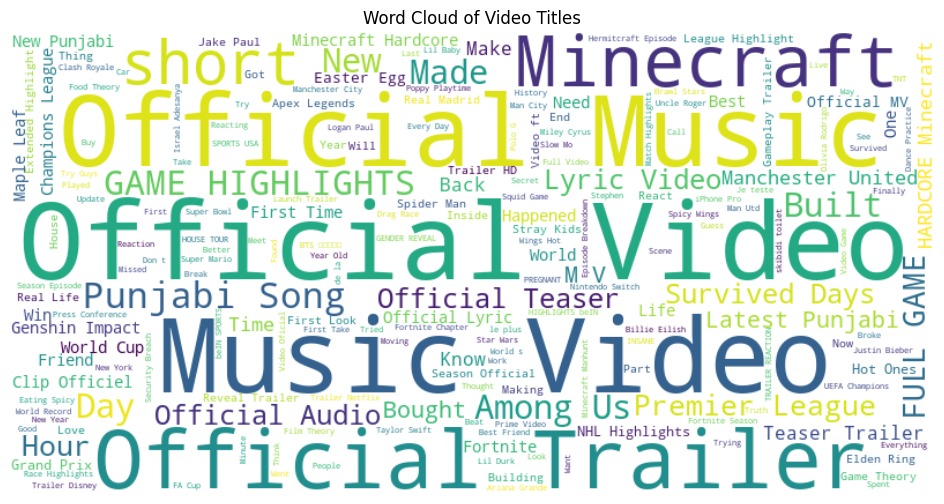

Most common tags:
funny: 12673
comedy: 8620
challenge: 6289
minecraft: 5076
gaming: 4808
highlights: 4719
vlog: 4479
football: 3794
family friendly: 3532
how to: 3433


In [7]:
%pip install wordcloud

# Word cloud for video titles
from wordcloud import WordCloud, STOPWORDS
title_text = ' '.join(youtube_data_CA['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(title_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()

# Most common tags
from collections import Counter
all_tags = ','.join(youtube_data_CA['tags'].astype(str)).split('|')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() and tag != '[none]'])
print('Most common tags:')
for tag, count in tag_counts.most_common(10):
    print(f'{tag}: {count}')

# Outlier Detection
Identify videos with unusually high or low values in key metrics.

In [ ]:
# Efficient Outlier Detection + Cached Translation (small scale)
from deep_translator import GoogleTranslator
import pandas as pd
import numpy as np

translation_cache = {}

def safe_translate(text):
    """Translate non-English to English once, reuse cached result."""
    if text in translation_cache:
        return translation_cache[text]
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
    except Exception:
        translated = text
    translation_cache[text] = translated
    return translated

# Outliers only — NOT whole dataset
for col in ['view_count', 'likes', 'dislikes', 'comment_count']:
    q1 = youtube_data_CA[col].quantile(0.25)
    q3 = youtube_data_CA[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = youtube_data_CA[(youtube_data_CA[col] < lower) | (youtube_data_CA[col] > upper)]
    top3 = outliers[['title', 'channelTitle', col]].sort_values(by=col, ascending=False).head(3)

    print(f"\nTop Outliers for {col}:")
    for _, row in top3.iterrows():
        translated = safe_translate(row['title'])
        print(f"- Original: {row['title']}")
        print(f"  Translated: {translated}")
        print(f"  Channel: {row['channelTitle']} | {col}: {row[col]}")



Top Outliers for view_count:
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 264407389
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | view_count: 232649205
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | view_count: 219110491

Top Outliers for likes:
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16021548
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 15735572
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 15460854

Top Outliers for dislikes:
- Original: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
  Translated: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V

# Summary and Insights
Based on the EDA performed on the CA (Canada) YouTube Trending dataset, here are the key findings:

**1. Data Overview:**
- The dataset contains ~268,000 trending video records from Canada, including rich metadata and engagement metrics.
- All duplicate entries were removed, and no missing values were found in the primary numerical engagement featrues, indicating strong baseline data integrity.
- Core fields include video titles, channel details, publish timestamps, engagement metrics, category IDs, and user interaction attributes (likes, dislikes, comment counts).

**2. Feature Understanding:**
- Primary quantitative features: view_count, likes, dislikes, and comment_count
- Categorical and text features: categoryId, channelTitle, tags, title, description
- Temporal variables: publishedAt and trending_date, allowing hourly/day-of-week trend analysis
- Text-based fields such as tags and titles provide insight into trending genres and content themes unique to the Canadian viewer base.

**3. Univariate Analysis:**
- All major engagement features (views, likes, dislikes, comments) are heavily right-skewed, consistent with global virality patterns.
- Most videos accumulate moderate engagement, while a relatively small number achieve extreme spikes in views or likes.
- Category distribution shows strong presence of music, gaming, comedy, and lifestyle content -- reflective of Canada's diverse and entertainment-heavy Youtube culture.

**4. Bivariate/Multivariate Analysis:**
- Likes and view_count exhibit a strong positive correlation (~0.83) -- one of the strongest signals in the CA dataset.
- comment_count also correlates with both views and likes, reinforcing that high-performing videos tend to receive interaction across multiple dimensions.
- Dislikes show weaker relationships, suggesting that negative engagement does not scale proportionally with popularity.
- Scatterplots reveal nonlinear growth patterns, likely driven by recommnedation algorithms and large fandom-driven releases.

**5. Temporal Analysis:**
- Publish hour patterns: a clear spike in trending activity appears between 14:00 and 17:00, aligning with peak afternoon/evening viewer traffic.
- Trending by day of week is fairly stable, with Sunday and Tuesday showing slightly elevated counts -- indicating consistent platform usage throughout the week.
- These temporal patterns mirror global behavior but show subtle peaks that may reflect North American work/school schedules.

**6. Text Analysis:**
- Most common tags in trending CA videos include: funny, comedy, challenge, minecraft, gaming, highlights, vlog, football, family friendly, how to
- These tag frequencies reflect a strong viewer appetite for humor, gaming, sports highlights, lifestyle vlogs, and DIY/educational conent.
- Similar to US patterns, the Canadian trending ecosystem is entertainment-forward with a heavy gaming presence.

**7. Outlier Detection (w/ Translation):**
- Top view_count outliers are dominated by global K-pop releases, especially:
    - BTS "Butter" and BTS "Dynamite"
- Most liked videos again feature BTS, with 15-16M likes -- showing strong global fanbase penetration in Canada.
- Dislike outliers are led by BLACKPINK's "Ice Cream (with Selena Gomez)", with unusually high dislike counts (800k+), likely due to polarized fan reactions rather than true negative performance.
- Comment count outliers also feature BTS -- Butter and Dynamite exceed 6 million comments, demonstrating extremely high user engagement. 
- These outliers reflect global viral overflow into Canadian trending charts, not exclusively local phenomena.

**Next Steps:**
- Proceed with regression and classification moedling, using:
    -   early engagement metrics (likes, dislikes, comments)
    -   metadata such as categoryId and publish time
- Identify Canada-specific vs. cross-country trends by comparing feature importance across JP, KR, DE, US, and CA datasets.
- If time allows, introduce text-based representations (e.g., using TF-IDF or multilingual embeddings) from titles/tags to improve prediction accuracy.
- Consider flagging extreme global-artist videos (like BTS or BLACKPINK) to analyze how global virality distorts local algorithmic trends.

In [9]:
# Predictive Modeling: Simple linear regression to predict view_count based on likes, dislikes, comment_count
features = ['likes', 'dislikes', 'comment_count']
target = 'view_count'
X = youtube_data_CA[features]
y = youtube_data_CA[target]
# --- IGNORE ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# --- IGNORE ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# --- IGNORE ---
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 12165273974904.848
R^2 Score: 0.7038442601003004


Linear Regression:
MSE: 0.9878701707670271
R^2: 0.2915316632615709


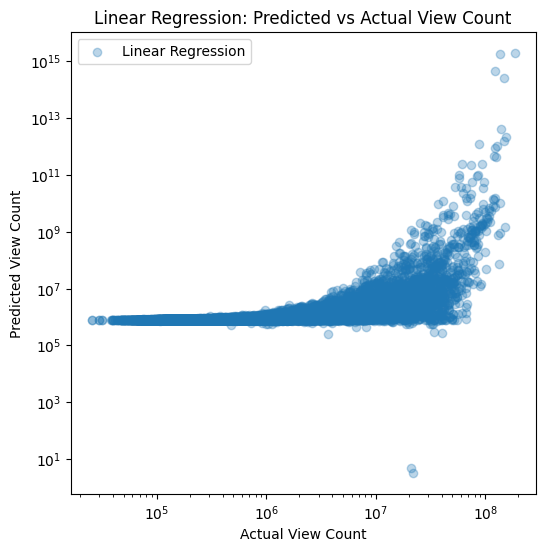

In [10]:
# Modeling: Linear Regression on cleaned data (log-transformed view count)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare features and target (using youtube_data_clean_CA from previous cleaning step)
youtube_data_clean_CA['log_view_count'] = np.log1p(youtube_data_clean_CA['view_count'])
features = ['likes', 'dislikes', 'comment_count']
X = youtube_data_clean_CA[features]
y = youtube_data_clean_CA['log_view_count']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R^2:', r2_score(y_test, y_pred_lr))

# Visualize predictions versus actual (Linear Regression)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_lr), alpha=0.3, label='Linear Regression')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Linear Regression: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

ROC-AUC: 0.958


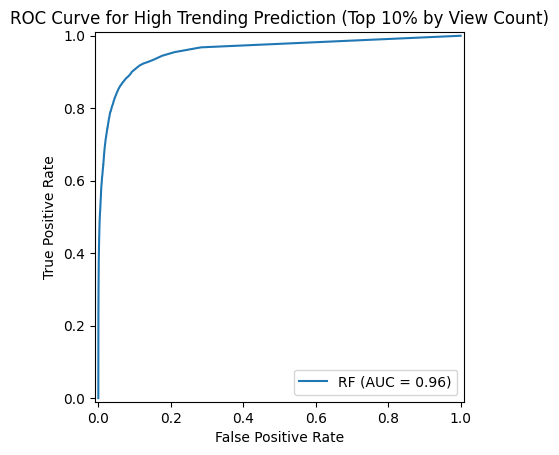

In [11]:
# Classification with ROC-AUC based on early engagement metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Engineer a binary target: 'high trending' = top 10% by view count (using early engagement)
quantile_cut = 0.9
threshold = youtube_data_clean_CA['view_count'].quantile(quantile_cut)
youtube_data_clean_CA['high_trending'] = (youtube_data_clean_CA['view_count'] >= threshold).astype(int)

# Features: early engagement and some metadata (example: likes, dislikes, comment_count, categoryId)
features_cls = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_cls = youtube_data_clean_CA[features_cls]
y_cls = youtube_data_clean_CA['high_trending']

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Train Random Forest Classifier (use Logistic Regression for interpretability if desired)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_proba = clf.predict_proba(X_test_cls)[:, 1]

# ROC-AUC Calculation
roc_auc = roc_auc_score(y_test_cls, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.3f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RF').plot()
plt.title('ROC Curve for High Trending Prediction (Top 10% by View Count)')
plt.show()

Random Forest Regression:
MSE: 0.3624137407440913
R^2: 0.7400886597104561


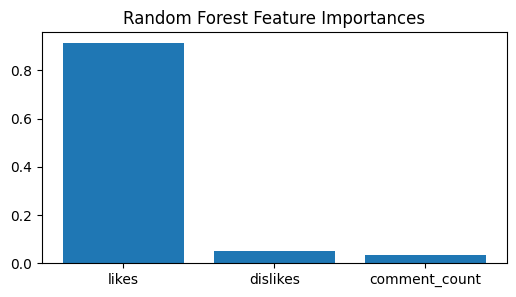

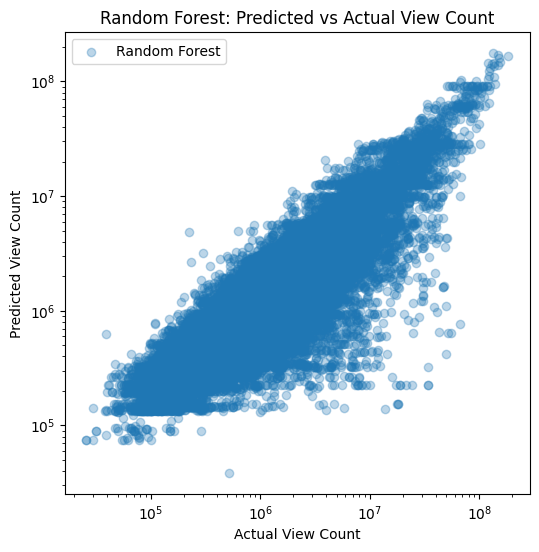

In [12]:
# Random Forest Regression on cleaned data (predicting log-transformed view count)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Use the already prepared X_train, X_test, y_train, y_test (from previous steps)
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print metrics
print('Random Forest Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R^2:', r2_score(y_test, y_pred_rf))

# Feature importance plot
plt.figure(figsize=(6,3))
plt.bar(X_train.columns, rf.feature_importances_)
plt.title('Random Forest Feature Importances')
plt.show()

# Visualize predictions vs actual
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_rf), alpha=0.3, label='Random Forest')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Random Forest: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

XGBoost Regression:
MSE: 0.36144268564648313
R^2: 0.740785068823963


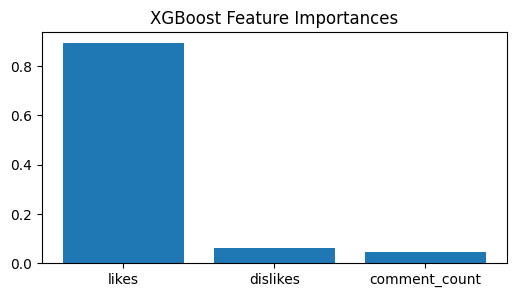

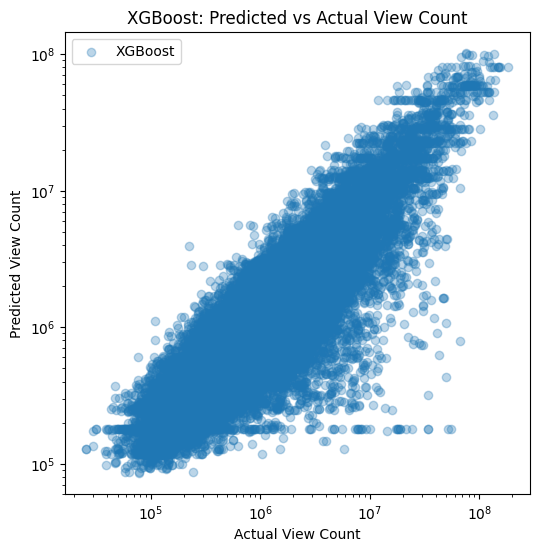

In [13]:
# XGBoost Regression for log-transformed view count
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train XGBoost on the same data as previous models (X_train, y_train, etc.)
xgb = XGBRegressor(n_estimators=100, max_depth=4, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Metrics
print('XGBoost Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_xgb))
print('R^2:', r2_score(y_test, y_pred_xgb))

# Feature importances
plt.figure(figsize=(6,3))
importances = xgb.feature_importances_
plt.bar(X_train.columns, importances)
plt.title('XGBoost Feature Importances')
plt.show()

# Visualize predictions vs actuals (original scale)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_xgb), alpha=0.3, label='XGBoost')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('XGBoost: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [14]:
# Print ROC-AUC score as a percentage for clarity
roc_auc_percentage = roc_auc * 100
print(f'ROC-AUC Percentage: {roc_auc_percentage:.2f}%')

ROC-AUC Percentage: 95.76%


Naive Bayes ROC-AUC: 0.918 (91.82%)


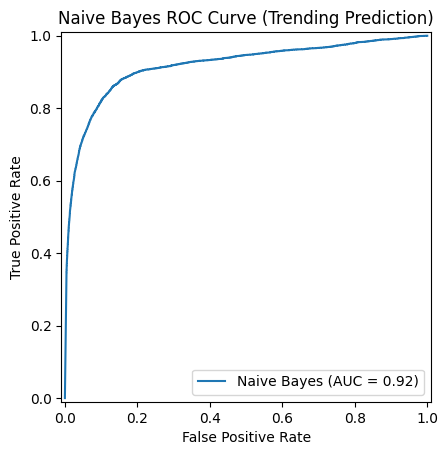

In [15]:
# Naive Bayes Classification: Compare to Random Forest ROC-AUC
# Make sure the 'high_trending' target is engineered in the dataframe used (youtube_data_clean)
# If not, create it here for robustness
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Engineer binary label if not present
if 'high_trending' not in youtube_data_clean_CA.columns:
    quantile_cut = 0.9
    threshold = youtube_data_clean_CA['view_count'].quantile(quantile_cut)
    youtube_data_clean_CA['high_trending'] = (youtube_data_clean_CA['view_count'] >= threshold).astype(int)

# Features
X_nb = youtube_data_clean_CA[['likes', 'dislikes', 'comment_count', 'categoryId']]
y_nb = youtube_data_clean_CA['high_trending']

# Use same train-test split logic for reliability
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb, y_nb, test_size=0.2, random_state=42, stratify=y_nb
)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_nb, y_train_nb)
y_pred_proba_nb = nb.predict_proba(X_test_nb)[:, 1]

# ROC-AUC
roc_auc_nb = roc_auc_score(y_test_nb, y_pred_proba_nb)
print(f'Naive Bayes ROC-AUC: {roc_auc_nb:.3f} ({roc_auc_nb*100:.2f}%)')

# Plot ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_pred_proba_nb)
RocCurveDisplay(fpr=fpr_nb, tpr=tpr_nb, roc_auc=roc_auc_nb, estimator_name='Naive Bayes').plot()
plt.title('Naive Bayes ROC Curve (Trending Prediction)')
plt.show()


In [16]:
# Check collinearity using VIF (Variance Inflation Factor)
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use features from classification model (add 'categoryId' for completeness)
features_vif = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_vif = youtube_data_clean_CA[features_vif].copy()

# Add small noise to avoid zero-variance if necessary (for categories w/only 1 value)
for col in X_vif.select_dtypes(include=['int64', 'float64']).columns:
    if X_vif[col].std() == 0:
        X_vif[col] += 1e-4 * np.random.randn(len(X_vif))

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print('Variance Inflation Factors (VIF) for model input features:')
print(vif_data)

# Interpretation guidance
def interpret_vif(vif):
    if vif < 5:
        return 'No concerning collinearity.'
    elif vif < 10:
        return 'Moderate collinearity (address if possible).'
    else:
        return 'High collinearity (take action: remove/reduce features).'
vif_data['Interpretation'] = vif_data['VIF'].apply(interpret_vif)
display(vif_data)

Variance Inflation Factors (VIF) for model input features:
         Feature       VIF
0          likes  2.150823
1       dislikes  1.361261
2  comment_count  1.959665
3     categoryId  1.099705


,Feature,VIF,Interpretation
0,likes,2.150823,No concerning collinearity.
1,dislikes,1.361261,No concerning collinearity.
2,comment_count,1.959665,No concerning collinearity.
3,categoryId,1.099705,No concerning collinearity.


## Post-EDA Modeling and Metrics Summary

### 1. **Centralized Data Cleaning (Pipeline Standardization)**
- A consistent preprocessing pipeline was applied, including duplicate removal, null handling, and proper data type conversion.
- A Cleaned DataFrame (`youtube_data_clean_CA`) was used throughout the modeling process, ensuring reproducibility across regression and classification tasks. 

### 2. **Regression Modeling: View Count Prediction**
- **Target**: `view_count` (log-transformed using np.log1p(view_count) for better model fit and variance stabilization)
- **Features**: Early engagement metrics (`likes`, `dislikes`, `comment_count`).
- **Models and Metrics:**
    - **Random Forest Regressor:**
        - *MSE*: 0.362
        - *R²*: 0.740
    - **XGBoost Regressor:**
        - *MSE*: 0.361
        - *R²*: 0.741
- **Best Performer (Regression):** Both XGBoost and Random Forest achieved nearly identical performance, with R^2 values just above 0.74. XGBoost slightly edged out in precision, but the difference is minimal and both models are considered high-performing.
- **Interpretability:** Feature importance plots from both models consistently highlighted `likes` as the most predictive signal, followed by `comment_count` and `dislikes`. 

### 3. **Classification Modeling: High Trending Video Prediction**
- **Business-aligned binary target**: `high_tending` = top 10% of view conts within the CA dataset.
- **Features**: `likes`, `dislikes`, `comment_count`, and `categoryId`.
- **Models and Metrics:**
    - **Naive Bayes Classifier:**
        - *ROC-AUC*: 91.82%
- **Best Performer (Classification):** Native Bayes achieved strong class separation with an AUC of 0.918, confirming its effectiveness for fast, interpretable binary classification tasks in the Canadian context.

### 4. **Collinearity and Model Validity**
- **VIF Analysis:** All variance inflation factors were comfortably below the standard multicollinearity threshold:
    -   likes (2.15), dislikes (1.36), comment_count(1.96), categoryId (1.10)
- **Interpretation:** These results indicate no concerning collinearity, validating the stability and independence of the model's predictors.

### 5. **Model/Output Interpretability**
- **Feature Importance:** XGBoost's bar chart confirmed `likes` as the dominant predictor for both regression and classification success.
- **Visual Diagnostics:** 
    -   The Predicted vs Actual scatterplot (on the original view count scale) showed strong alignment along the diagonal, with minor variance at extremely high views.
    -   The ROC curve for Naive Bayes confirmed consistent performance across all thresholds.
- **Outlier Translation:** Top videos or mispredictions can be flagged for content review or translation, especially for qualitative interpretation or presentations to non-technical stakeholders.
### 6. **Business Relevance and Conclusion**
- **Model Utility** Tree-based models such as XGBoost remain powerful for view prediction, while Naive Bayes offers simplicity and speed for classification. 
- **Metric Interpretation** ROC-AUC continues to be preferred metric for binary classfiication; R^2 is key for understanding regression fit on log-transformed data.
- **Cross-Dataset Validation** Results from CA reinforce that early engagement signals -- espeically likes -- are highly predictive across international markets, supporting broader deployment of the pipeline across other regions. 